## Install Dependencies

In [29]:
#installing packages
import lasio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')
import pandas as pd
import welly
from welly import Well
from welly import Curve

## Functions

In [2]:
# This is a function to show information above the column inside a las file. 
# the function uses lasio

def las_info(df):
  '''
  importing lasio and quickly show the relevant information inside the las file
  note: las_data is the output of lasio.read
  '''

  import lasio

  for item in df.well:
    print(f"{item.descr} ({item.mnemonic}): {item.value}")


In [30]:
# This is the function to plot triple combo data from dataframe created from las file. 
# Please make sure the las file has been imported into dataframe by using lasio and pandas

def tc_plot(well_name, well_df, curve_names, top_depth=0, bot_depth=10000, savepdf=False,
            plot_w=10,plot_h=10, title_size=12, title_height=1.05, line_width=1,plot_tight=False, 
            gr_color='green', gr_trackname='GR', gr_left=0, gr_right=200, gr_cutoff=50, gr_shale='lime', gr_sand='gold', gr_base=0, gr_div=5,
            res_color='purple', res_trackname='RESISTIVITY', res_left=0.2, res_right=20000, res_cutoff=50, res_shading='lightcoral',
            den_color='red', den_trackname='DENSITY', den_left=1.95, den_right=2.95, 
            neu_color='blue', neu_trackname='NPHI', neu_left=0.45, neu_right=-0.15, 
            den_neu_div=5, dn_xover='yellow', dn_sep='lightgray'):
  

  '''


  - The function plot triple combo consisting three well logs data of gamma ray, resistivity, and density-neutron.
  - One has to define a list of column name of each curves, based on the dataframe of the well. 
  
  To make the plot correctly, one must follow the below orders:

  1. the sequence of triple combo must be create into a list, with the exact order as follows:
        curve_list = ['Gamma Ray', 'Resistivity', 'Density', 'Neutron'] 

  2. the dataframe must contain a depth column name 'DEPTH' 


  '''
  

  #install dependencies
  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd


  fig, ax = plt.subplots(figsize=(plot_w,plot_h))
  fig.suptitle(f"Well: {well_name}\n( Interval: {top_depth} - {bot_depth} )",
              size=title_size, y=title_height)
  
  gr_log=well_df[curve_names[0]]
  res_log=well_df[curve_names[1]]
  den_log=well_df[curve_names[2]]
  neu_log=well_df[curve_names[3]]
  
  #Set up the plot axes
  ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
  ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1)
  ax3 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1)
  ax4 = ax3.twiny() #Twins the y-axis for the density track with the neutron track

  # As our curve scales will be detached from the top of the track,
  # this code adds the top border back in without dealing with splines
  ax7 = ax1.twiny()
  ax7.xaxis.set_visible(False)
  ax8 = ax2.twiny()
  ax8.xaxis.set_visible(False)
  ax9 = ax3.twiny()
  ax9.xaxis.set_visible(False)

  # Gamma Ray track
  ax1.plot(gr_log, "DEPTH", data = well_df, color = gr_color, lw=line_width)
  ax1.set_xlabel(gr_trackname)
  ax1.set_xlim(gr_left, gr_right)
  ax1.set_ylim(bot_depth, top_depth)
  ax1.xaxis.label.set_color(gr_color)
  ax1.tick_params(axis='x', colors=gr_color)
  ax1.spines["top"].set_edgecolor(gr_color)
  ax1.spines["top"].set_position(("axes", 1.02))
  ax1.set_xticks(list(np.linspace(gr_left, gr_right, num = gr_div)))

  ax1.grid(which='major', color='lightgrey', linestyle='-')
  ax1.xaxis.set_ticks_position("top")
  ax1.xaxis.set_label_position("top")

  ##area-fill sand and shale from gr
  ax1.fill_betweenx(well_df['DEPTH'], gr_base, gr_log, where=(gr_cutoff >= gr_log), interpolate=True, color = gr_sand, linewidth=0)
  ax1.fill_betweenx(well_df['DEPTH'], gr_base, gr_log, where=(gr_cutoff <= gr_log), interpolate=True, color = gr_shale, linewidth=0)

  # RES track
  ax2.plot(res_log, "DEPTH", data = well_df, color = res_color, lw=line_width)
  ax2.set_xlabel(res_trackname)
  ax2.set_xlim(res_left, res_right)
  ax2.set_ylim(bot_depth, top_depth)
  ax2.semilogx()
  ax2.minorticks_on()
  ax2.xaxis.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')   
  ax2.xaxis.label.set_color(res_color)
  ax2.tick_params(axis='x', colors=res_color)
  ax2.spines["top"].set_edgecolor(res_color)
  ax2.spines["top"].set_position(("axes", 1.02))

  ax2.grid(which='major', color='lightgrey', linestyle='-')
  ax2.xaxis.set_ticks_position("top")
  ax2.xaxis.set_label_position("top")


  ax2.fill_betweenx(well_df['DEPTH'], res_cutoff, res_log, where=(res_log >= res_cutoff), interpolate=True, color = res_shading, linewidth=0)

  # Density track
  ax3.plot(den_log, "DEPTH", data = well_df, color = den_color, lw=line_width)
  ax3.set_xlabel(den_trackname)
  ax3.set_xlim(den_left, den_right)
  ax3.set_ylim(bot_depth, top_depth)
  ax3.xaxis.label.set_color(den_color)
  ax3.tick_params(axis='x', colors=den_color)
  ax3.spines["top"].set_edgecolor(den_color)
  ax3.spines["top"].set_position(("axes", 1.02))
  ax3.set_xticks(list(np.linspace(den_left, den_right, num = den_neu_div)))

  ax3.grid(which='major', color='lightgrey', linestyle='-')
  ax3.xaxis.set_ticks_position("top")
  ax3.xaxis.set_label_position("top")

  # Neutron trak placed ontop of density track
  ax4.plot(neu_log, "DEPTH", data = well_df, color = neu_color, lw=line_width)
  ax4.set_xlabel(neu_trackname)
  ax4.xaxis.label.set_color(neu_color)
  ax4.set_xlim(neu_left, neu_right)
  ax4.set_ylim(bot_depth, top_depth)
  ax4.tick_params(axis='x', colors=neu_color)
  ax4.spines["top"].set_position(("axes", 1.08))
  ax4.spines["top"].set_visible(True)
  ax4.spines["top"].set_edgecolor(neu_color)
  ax4.set_xticks(list(np.linspace(neu_left, neu_right, num = den_neu_div)))

  #shading between density and neutron
  x1=den_log
  x2=neu_log

  x = np.array(ax3.get_xlim())
  z = np.array(ax4.get_xlim())

  nz=((x2-np.max(z))/(np.min(z)-np.max(z)))*(np.max(x)-np.min(x))+np.min(x)

  ax3.fill_betweenx(well_df['DEPTH'], x1, nz, where=x1>=nz, interpolate=True, color=dn_sep, linewidth=0)
  ax3.fill_betweenx(well_df['DEPTH'], x1, nz, where=x1<=nz, interpolate=True, color=dn_xover, linewidth=0)


  #end
      

  if plot_tight is True:
    plt.tight_layout()

  if savepdf is True:
    plt.savefig(working_dir+(f"{well_name}_triple_combo_plot.pdf"), dpi=150, bbox_inches='tight')

  
  plt.show() 

## Importing Data

In [4]:
# setup the working directory, important when saving the file to pdf. 

working_dir = 'logs/'

# load the las using welly
w=Well.from_las(working_dir+'Barossa-2.las')

/opt/homebrew/Caskroom/miniconda/base/envs/petrophysics/lib/python3.9/site-packages/welly/well.py:194: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)


## EDA

In [5]:
w

Well(uwi: '', 35 curves: ['TVD', 'ROP_AVG', 'TCDM', 'BITSIZE', 'GRCM', 'GRCFM', 'GR1BFM', 'GR2BFM', 'GR1AFM', 'GR2AFM', 'RACHM', 'RPCHM', 'RPTHM', 'ACTECDM', 'APRESM', 'BRAM', 'BDCFM', 'BDCM', 'CALCFM', 'NPLFM', 'NPLM', 'DPEM', 'DRHM', 'DRHFM', 'DPEFM', 'CALCX', 'BDCX', 'DRHX', 'TCDX', 'GR2CX', 'ACTECDX', 'APRESX', 'RACHX', 'RPCHX', 'NPLX'])

In [6]:
w.header

{'name': 'Barossa-2', 'uwi': '', 'field': 'Barossa', 'company': 'Conoco-Phillips'}

In [7]:
#extracting well name for plot later on.
well_name = w.header.name
well_name

'Barossa-2'

/opt/homebrew/Caskroom/miniconda/base/envs/petrophysics/lib/python3.9/site-packages/welly/well.py:593: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


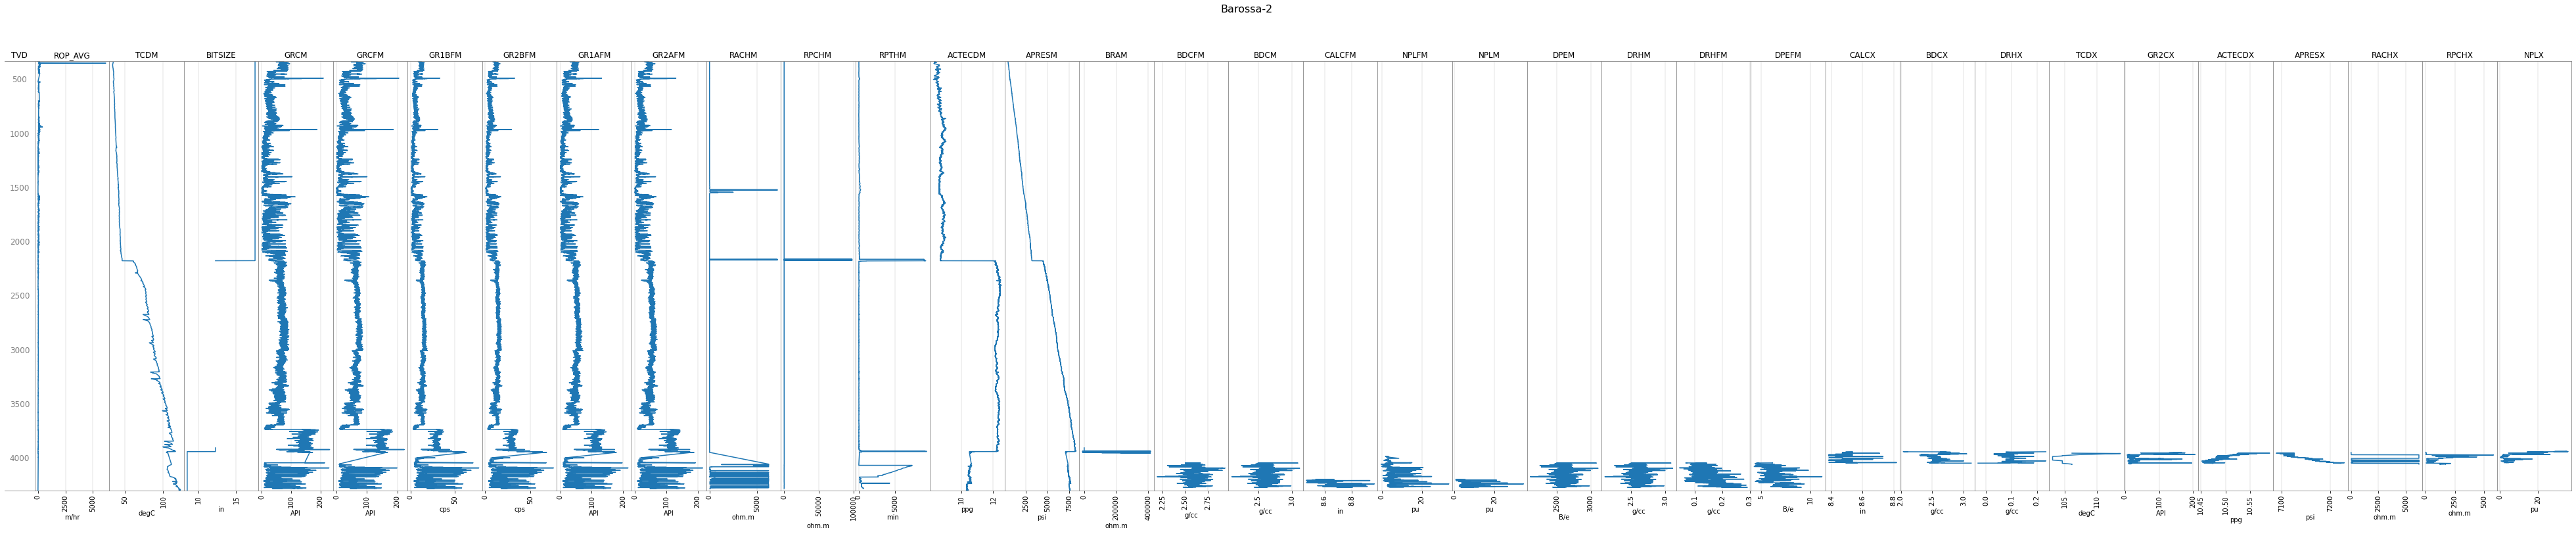

In [8]:
w.plot()

From the above plot, only several logs are available at all interval. Primarily across depth 4000-4300. We can then adjust the depth, to see it better. 

/opt/homebrew/Caskroom/miniconda/base/envs/petrophysics/lib/python3.9/site-packages/welly/well.py:593: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


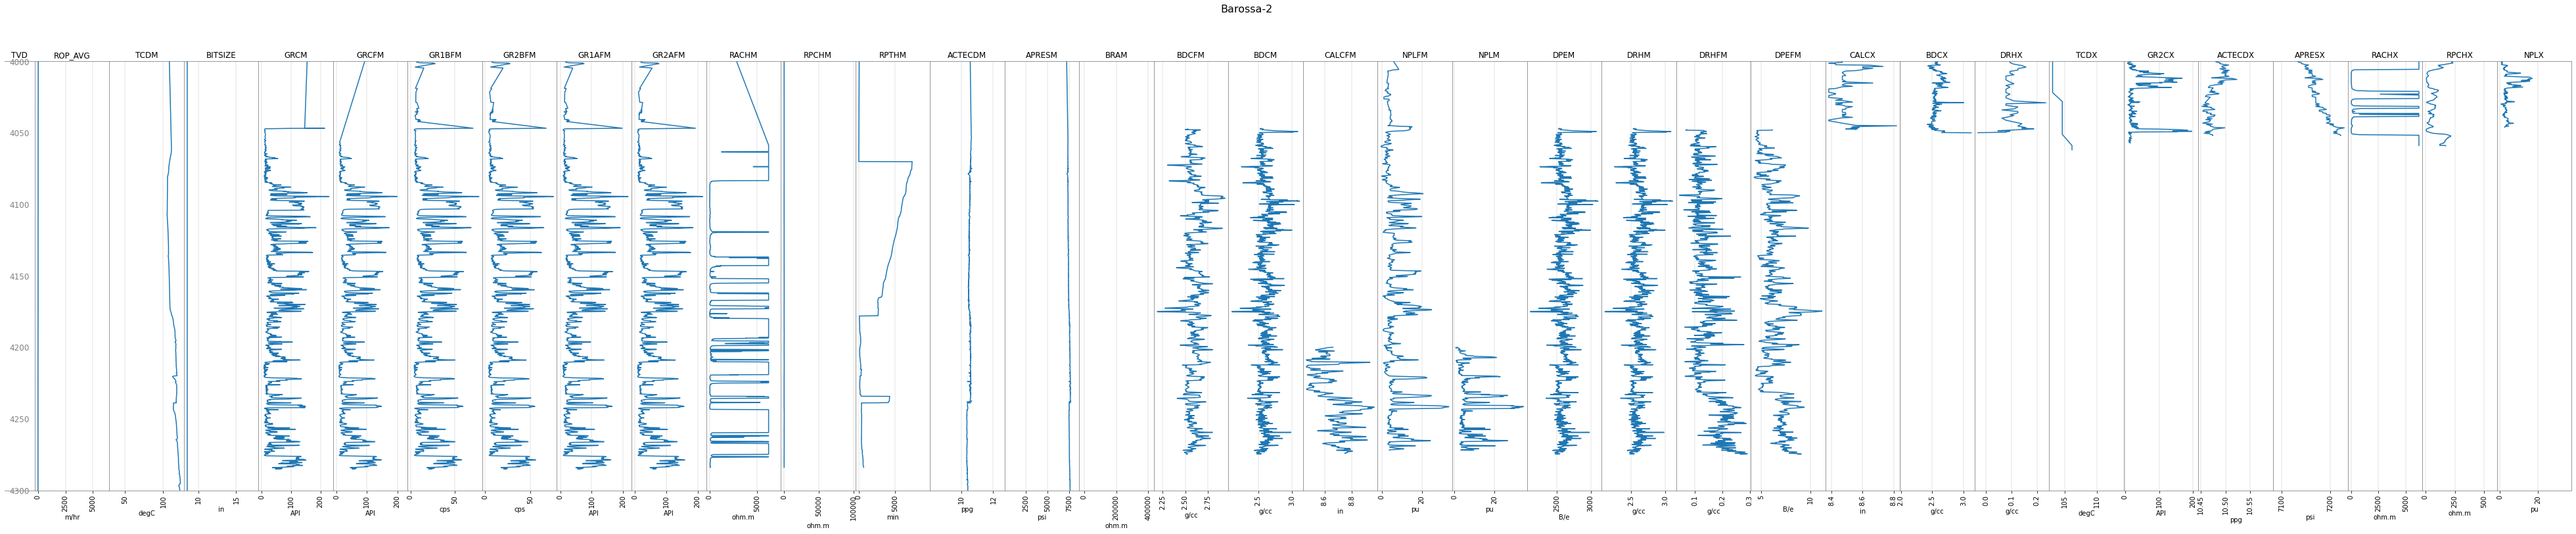

In [9]:
w.plot(extents=(4000,4300))

In [10]:
#we can use welly to convert las file to dataframe, but the DEPTH column will be missing. 

logs=w.df()
logs

,TVD,ROP_AVG,TCDM,BITSIZE,GRCM,GRCFM,GR1BFM,GR2BFM,GR1AFM,GR2AFM,...,CALCX,BDCX,DRHX,TCDX,GR2CX,ACTECDX,APRESX,RACHX,RPCHX,NPLX
Depth,,,,,,,,,,,,,,,,,,,,,
338.0,NaN,NaN,NaN,17.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338.1,NaN,NaN,NaN,17.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338.2,338.1879,0.0000,NaN,17.5,59.2009,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338.3,338.2879,22.7735,NaN,17.5,61.5788,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338.4,338.3879,51.8717,NaN,17.5,63.9567,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4300.6,NaN,NaN,121.6621,8.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4300.7,NaN,NaN,121.6774,8.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4300.8,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning and Prep

In [11]:
#resetting the index
logs.reset_index(inplace=True)
logs.head()


,Depth,TVD,ROP_AVG,TCDM,BITSIZE,GRCM,GRCFM,GR1BFM,GR2BFM,GR1AFM,...,CALCX,BDCX,DRHX,TCDX,GR2CX,ACTECDX,APRESX,RACHX,RPCHX,NPLX
0,338.0,NaN,NaN,NaN,17.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,338.1,NaN,NaN,NaN,17.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,338.2,338.1879,0.0000,NaN,17.5,59.2009,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,338.3,338.2879,22.7735,NaN,17.5,61.5788,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,338.4,338.3879,51.8717,NaN,17.5,63.9567,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#changing the Depth into DEPTH

logs = logs.rename(columns = {"Depth":"DEPTH"})
logs.head()

,DEPTH,TVD,ROP_AVG,TCDM,BITSIZE,GRCM,GRCFM,GR1BFM,GR2BFM,GR1AFM,...,CALCX,BDCX,DRHX,TCDX,GR2CX,ACTECDX,APRESX,RACHX,RPCHX,NPLX
0,338.0,NaN,NaN,NaN,17.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,338.1,NaN,NaN,NaN,17.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,338.2,338.1879,0.0000,NaN,17.5,59.2009,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,338.3,338.2879,22.7735,NaN,17.5,61.5788,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,338.4,338.3879,51.8717,NaN,17.5,63.9567,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plotting Triple Combo Data

In [13]:
#setting up the list of triple combo curves ['Gamma Ray', 'Resistivity', 'Density', 'Neutron'] --> has to be in this exact order
curve_list = ['GRCFM', 'RPCHM', 'BDCFM', 'NPLFM']

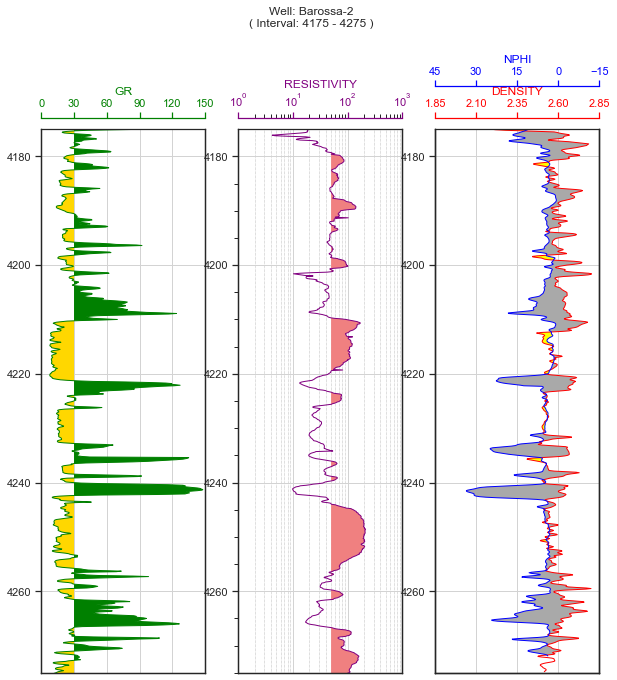

In [31]:
#plotting the data and customizing the plot
tc_plot('Barossa-2', logs, curve_list, top_depth=4175, bot_depth=4275,
        gr_right=150, gr_div=6,gr_cutoff=30,gr_base=30,gr_shale='green',
        den_left=1.85, den_right=2.85,neu_left=45,
        neu_right=-15,dn_sep='darkgrey',
        res_left=1, res_right=1000,
        savepdf=True) 